# Airlines Delay

Introduction:

 Domestic flight delays cost passengers, airlines, and other sectors of the economy 32.9 billion dollars annually, according to a US Federal Aviation Administration estimate from 2010. More than half of that money comes out of the pockets of passengers who are forced to stay in hotel rooms while they are stranded in addition to losing time waiting for their planes to take off and missing connections.
 From January to December 2008, this dataset comprises information on more than 1.9 million flights from 20 carriers and 303 locations. I'll begin by reading the data in, adding other datasets to the data to further provide clarity, then cleaning the data.
Then I'll start analyzing the data, looking for trends associated with delayed flights, a history of prior flight experiences, and an assessment of the severity of flight cancellations and delays.
Next, look for patterns in the data, and finally, suggest any potential remedies for the delays.

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (15,8)

Importing Dataset

Link to Dataset: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses/download?datasetVersionNumber=2

In [26]:
pd.set_option("display.max_columns", None)
df = pd.read_csv(r"C:\Users\lolad\Desktop\pandas\DelayedFlightssssss.csv")
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Optimizing

In [28]:
df[["Year", "Month", "DayofMonth", "DayOfWeek","UniqueCarrier", "Origin", "Dest"]] = df[["Year", "Month", "DayofMonth", "DayOfWeek", "UniqueCarrier", "Origin", "Dest"]].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Unnamed: 0         int64   
 1   Year               category
 2   Month              category
 3   DayofMonth         category
 4   DayOfWeek          category
 5   DepTime            float64 
 6   CRSDepTime         int64   
 7   ArrTime            float64 
 8   CRSArrTime         int64   
 9   UniqueCarrier      category
 10  FlightNum          int64   
 11  TailNum            object  
 12  ActualElapsedTime  float64 
 13  CRSElapsedTime     float64 
 14  AirTime            float64 
 15  ArrDelay           float64 
 16  DepDelay           float64 
 17  Origin             category
 18  Dest               category
 19  Distance           int64   
 20  TaxiIn             float64 
 21  TaxiOut            float64 
 22  Cancelled          int64   
 23  CancellationCode   object  
 24  Diverted           int64

Cleaning the Data

In [3]:
#Dropping the columns Unnamed: 0
df = df.drop(columns = "Unnamed: 0")

#Populating the data set with the Air Carrier Name
Airline = pd.read_csv("CarrierCodes & Names.csv")

#Merging the AirCarrier Name to my Data Frame
df = df.merge(Airline, how = "left", left_on = "UniqueCarrier", right_on = "IATA Code")

#Populating the Dataset with city and Country of origin of the flight
Airport_Codes = pd.read_csv("Airpot Codes.csv")

#Merging
df = df.merge(Airport_Codes, how = "left", left_on = "Origin", right_on = "Code")

#Populating the dataset with City, Airport and Country of Destination of the flight
AirportDest_Code = pd.read_csv("Airpot Codes Dest.csv")

#Merging
df = df.merge(AirportDest_Code, how = "left", left_on = "Dest", right_on = "CodeofD")

#Re-Arranging My Data Frame
AirCarrier = df["Air Carrier Name"]
df.insert(loc = 9, column = "AirCarrier", value = AirCarrier)
CityofOrigin = df["City"]
df.insert(loc = 18, column = "CityofOrigin", value = CityofOrigin)
CountryofOrigin = df["Country "]
df.insert(loc = 19, column = "CountryofOrigin", value = CountryofOrigin)
City_of_Destination = df["City of Destination"]
df.insert(loc = 21, column = "CityofDestination", value = City_of_Destination)
Country_of_Destination = df["Country of Destination"]
df.insert(loc = 22, column = "CountryofDestination", value = Country_of_Destination)

#Populating the Dataframe with Trip Column
Trip = df["CityofOrigin"] + "- " + df["City of Destination"]
df.insert(loc = 23, column = "Trip", value= Trip)

#Dropping Unused Columns
df = df.drop(columns = ["Air Carrier Name", "City", "Country ", "City of Destination", "Country of Destination", "IATA Code", "ICAO Code", "CodeofD", "Code", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"])

#Dropping Duplicates
df = df.drop_duplicates()

#Removing rows where all the values are null
df = df.dropna(how = "all")

#Viewing the Cleaned Data
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,CityofOrigin,CountryofOrigin,Dest,CityofDestination,CountryofDestination,Trip,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,Southwest Airlines,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,Washington DC,USA,TPA,"Tampa, FL",USA,"Washington DC - Tampa, FL",810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,Southwest Airlines,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,Washington DC,USA,TPA,"Tampa, FL",USA,"Washington DC - Tampa, FL",810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,Southwest Airlines,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,"Indianapolis, IN",USA,BWI,"Baltimore, MD",USA,"Indianapolis, IN - Baltimore, MD",515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,Southwest Airlines,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,"Indianapolis, IN",USA,BWI,"Baltimore, MD",USA,"Indianapolis, IN - Baltimore, MD",515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,Southwest Airlines,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,"Indianapolis, IN",USA,JAX,"Jacksonville, FL",USA,"Indianapolis, IN - Jacksonville, FL",688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Cleaned Data

In [21]:
df.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,AirCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,CityofOrigin,CountryofOrigin,Dest,CityofDestination,CountryofDestination,Trip,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,17,335,3761,128.0,150.0,116.0,-14.0,8.0,135,273,2,286,259,2,4749,810,4.0,8.0,0,3,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,17,17,3231,4121,128.0,145.0,113.0,2.0,19.0,135,273,2,286,259,2,4749,810,5.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,17,17,448,1953,96.0,90.0,76.0,14.0,8.0,140,119,2,48,18,2,2070,515,3.0,17.0,0,3,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,17,3920,2134,90.0,90.0,77.0,34.0,34.0,140,119,2,48,18,2,2070,515,3.0,10.0,0,3,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,17,17,378,3844,101.0,115.0,87.0,11.0,25.0,140,119,2,150,127,2,2084,688,4.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,1830,2037.0,1940,17,17,509,4054,240.0,250.0,230.0,57.0,67.0,140,119,2,156,148,2,2086,1591,3.0,7.0,0,3,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,706.0,700,916.0,915,17,17,100,3615,130.0,135.0,106.0,1.0,6.0,140,119,2,178,201,2,2095,828,5.0,19.0,0,3,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,1644.0,1510,1845.0,1725,17,17,1333,1357,121.0,135.0,107.0,80.0,94.0,140,119,2,178,201,2,2095,828,6.0,8.0,0,3,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,1029.0,1020,1021.0,1010,17,17,2272,995,52.0,50.0,37.0,11.0,9.0,140,119,2,180,51,2,2073,162,6.0,9.0,0,3,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1452.0,1425,1640.0,1625,17,17,675,1091,228.0,240.0,213.0,15.0,27.0,140,119,2,222,210,2,2097,1489,7.0,8.0,0,3,0,3.0,0.0,0.0,0.0,12.0


Now that is data is cleaned, with quick overview of the dataframe I was able to observe the following:
1. Information on the cause of the delay is only available when the arrival delay lasts more than 15 minutes. The total of the carrier delay, weather delay, NAS delay, and late aircraft delay equals the arrival delay. There is no information on delay causes in situations of cancellation or diversion.
2. Airports and airlines typically designate a CRSElapsedTime that is longer than the time actually spent in the Taxi In + Taxi Out + Airtime processes (Actual Elapsed Time). This explains why when a plane takes off on schedule, it typically lands earlier than predicted! Additionally, it enables the lane of linked planes to absorb delays caused by tardy aircraft.

# Analysis

Cancelled Flights:

Here i calculated overall percentage of Cancelled Flights.

In [12]:
#Overall Percentage Cancelled Flights
total_flights = df["FlightNum"].count()
total_cancelledflights = df["Cancelled"].sum()
cancelledflights = (total_cancelledflights / total_flights) * 100
cancelledflights.round(2)

0.03

This shows that 0.03% of the flights are been cancelled. Hence flights are barely cancelled.

Diverted Flights:

Here i calculated overall percentage of Diverted Flights.

In [12]:
#Overall Percentage Diverted
total_flights = df["FlightNum"].count()
total_divertedflights = df["Diverted"].sum()
DivertedFlights = (total_divertedflights / total_flights) * 100
DivertedFlights.round(3)

0.4

This Shows that 0.4% of the flights are been diverted. still considrable low but compared to cancelled Flights, flight are likely to be diverted than cancelled 

Comparing the Arrival Delay of each Air Carrier:

Here I compared each Air Carrier to the Average Arrival Delay in Minute

Text(0.5, 0, 'Average ArrDelay in Minute')

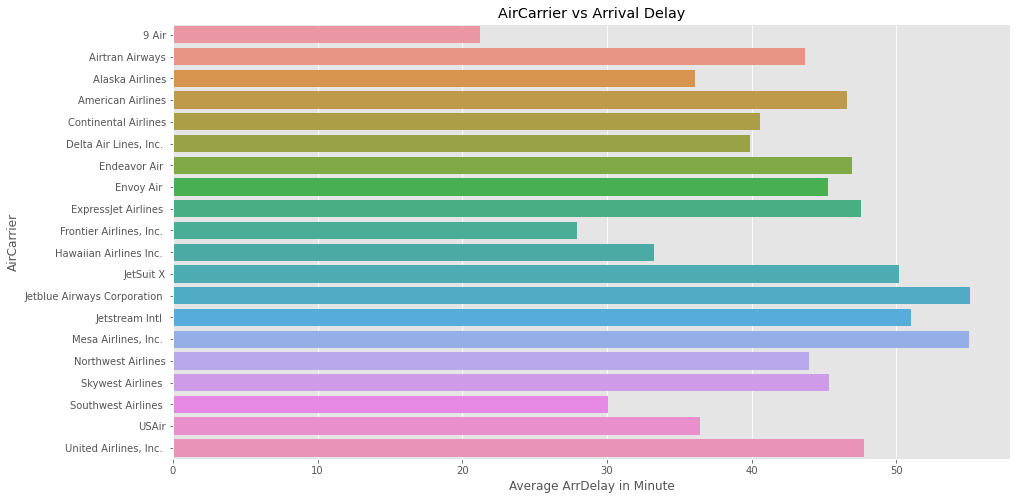

In [13]:
#Grouping by AirCarrier 
grouped_df = df.groupby("AirCarrier")["ArrDelay"].mean()

#Changing it to frame
grouped_df = grouped_df.to_frame(name = "ArrDelay")

#Setting Index
index = pd.Index(range(14))
grouped_df = grouped_df.reset_index()

#Ploting AirCarrier vs AggDelay in Minuite
sn.barplot(x = "ArrDelay", y = "AirCarrier", data = grouped_df)
plt.title("AirCarrier vs Arrival Delay")
plt.xlabel("Average ArrDelay in Minute")

This demonstrates that Mesa Airlines, Inc. and Jetblue Airways Corporation are the air carriers with the most arrival delays in minutes. Mesa Airlines, Inc. and Jetblue Airways Corporation both had average arrival delays of 54 minutes and 55 minutes, respectively. As a result, if a passenger flies with Jetblue Airways Corporation, Mesa Airlines Inc, Jetstream Int, or JetSuit X, they are most likely to arrive at their destination only after scheduled arrival time.

Visualization of AirCarrier and its Delays:

Here, we categorized by carrier and cancellation code to examine the numbers of cancellations experienced by each carrier as well as the distribution of cancellation causes. For the sake of normalization, we also display below the total number of flights from each carrier.

Text(0, 0.5, 'Average Delay in Minutes')

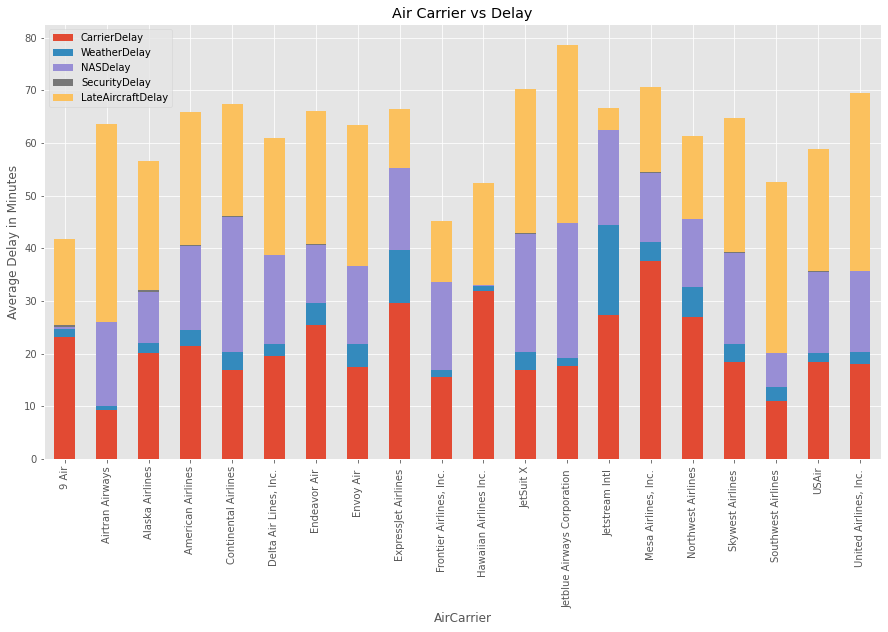

In [18]:
#Grouping all the Delay by Air Carrier
stacked_delay = df.groupby("AirCarrier")[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].mean()

#Visualizing the Each Delay with Air Carrier
stacked_delay.plot(kind = "bar", stacked = True)
plt.title("Air Carrier vs Delay")
plt.ylabel("Average Delay in Minutes")

The average carrier delay, weather delay, NAS delay, security delay, and late aircraft delay for each air carrier are shown in the figure above.
Due to the significant sum of null values in the Average CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay columns, this data is not entirely accurate.
We can see that the airline is only marginally delayed as a result of security concerns.

Comparing each Arrival Delay of each AirCarrier to Month:

Here, I divided the data by Air Carrier and Months to examine how Arrival Delay varied each month.

Text(0.5, 1.0, 'Arrival Delay vs Month')

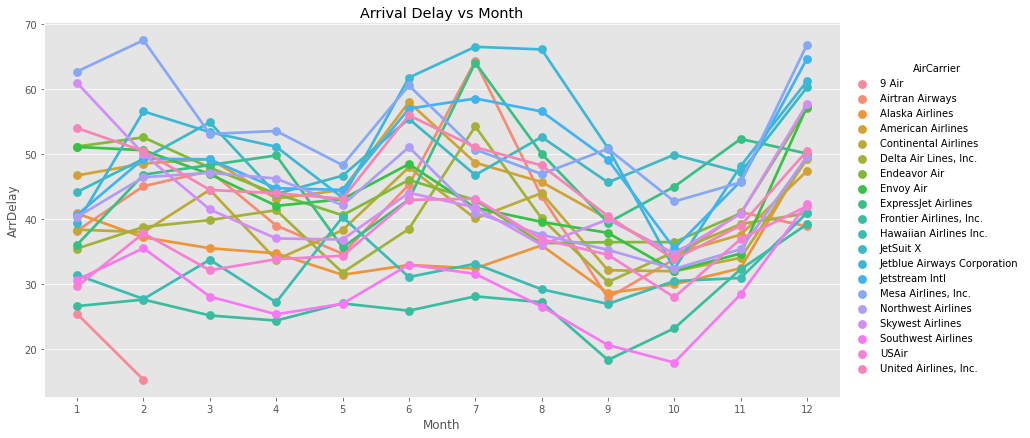

In [19]:
##Grouping by Month
df_grouped = df.groupby(["Month", "AirCarrier"])["ArrDelay"].mean()

#Converting to frame
df_grouped = df_grouped.to_frame(name = "ArrDelay")

#Setting Index
index = pd.Index(range(82))
df_grouped = df_grouped.reset_index()

#Plotting Months with Average Delay in minuite
sn.catplot(x = "Month", y = "ArrDelay", data = df_grouped, hue = "AirCarrier", kind = "point", height=6, aspect=2)
plt.title("Arrival Delay vs Month")

This data indicates that the average air carrier arrival delay is higher in February, June, and July. From November through December, it gradually increased to its peak.

Text(0.5, 1.0, 'Arrival Delay vs Month')

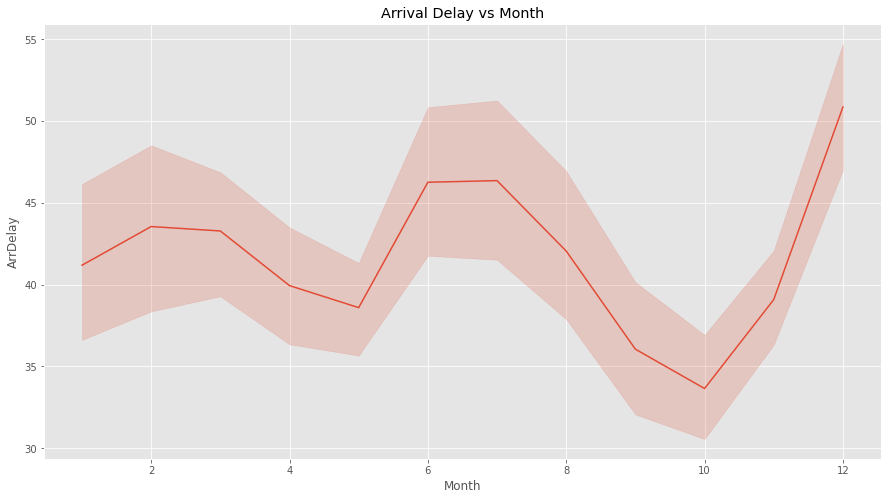

In [20]:
#Comparing Flights Delay to Months for Quicker Insights of the Delay with each months
sn.lineplot(x = "Month", y = "ArrDelay", data = df_grouped)
plt.title("Arrival Delay vs Month")

This data demonstrates that the average air carrier arrival delay decreases significantly from February to May, from July to October, and from October to December. Therefore, during the holiday season, a flight is more likely to arrive later than its scheduled arrival time.

Comparing each Air Carrier Delay to Days of the week:

In order to see how the arrival delay varies by day of the week, I organized the data here by Air Carrier and Days of the Week.

Text(0.5, 1.0, 'Air Carrier Delay vs Days of Week')

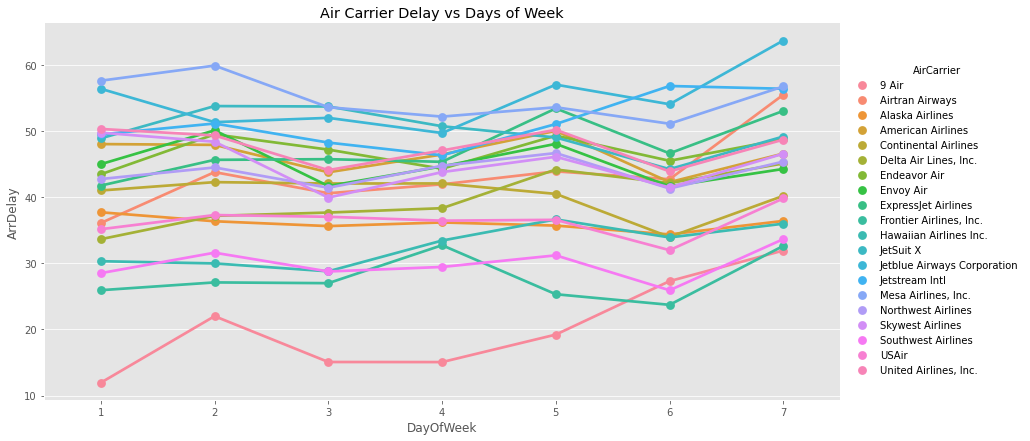

In [21]:
#Grouping Days of the week with AirCarrier
dfgrouped = df.groupby(["DayOfWeek", "AirCarrier"])["ArrDelay"].mean()

#Changing my table to frame
dfgrouped = dfgrouped.to_frame(name = "ArrDelay")

#Setting Index
index = pd.Index(range(98))
dfgrouped = dfgrouped.reset_index()

#Plotting Day of Week with average ArrDelay in Minute
sn.catplot(x = "DayOfWeek", y= "ArrDelay", data = dfgrouped, kind = "point", hue = "AirCarrier", height=6, aspect=2)
plt.title("Air Carrier Delay vs Days of Week")

Text(0.5, 1.0, 'Arrival Delay vs Days of Week')

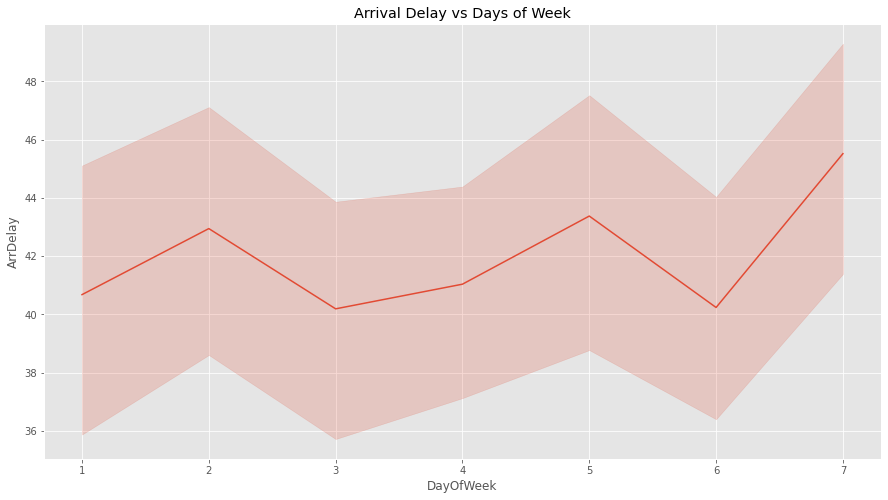

In [22]:
#Comparing Flights Delay to Months for Quick Visualization of the Delay with Days of the Week
sn.lineplot(x = "DayOfWeek", y = "ArrDelay", data = dfgrouped)
plt.title("Arrival Delay vs Days of Week")

According to this data, flights are less likely to arrive on Tuesdays and Saturdays and more likely to arrive later than the scheduled arrival time on Mondays, Fridays, and Sundays.

Evaluating each air carrier's delay in terms of days, days, and months
In order to see how the arrival delay varies by day of the month, I also organized the data here by air carrier and days of the month.

Text(0.5, 1.0, 'Arrival Delay vs Days of the Months')

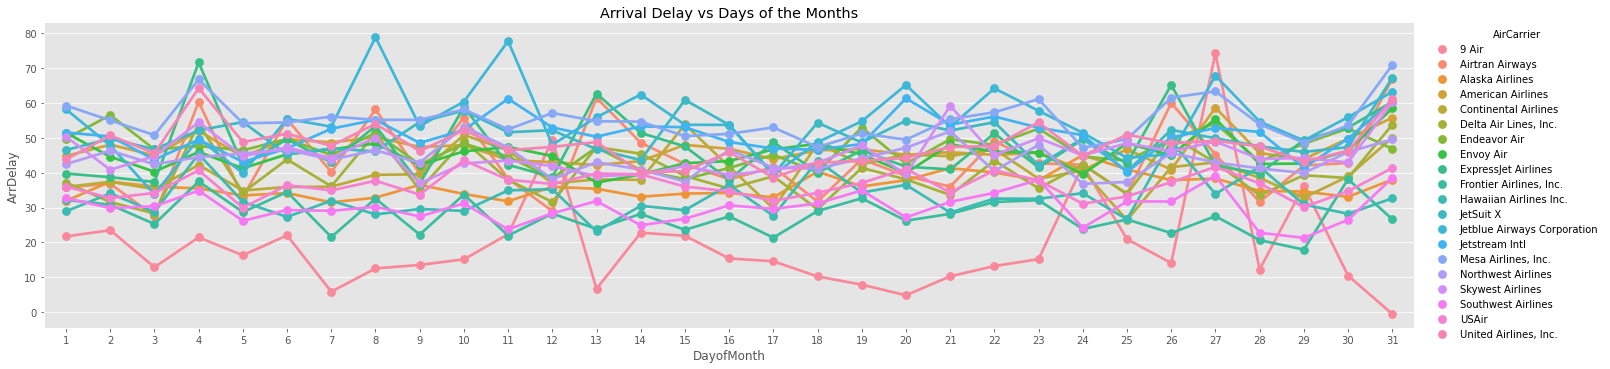

In [23]:
#Grouping Day of the Month with ArrDelay
df_monthgroup = df.groupby(["DayofMonth", "AirCarrier"])["ArrDelay"].mean()

#Changing the table to frame
df_monthgroup = df_monthgroup.to_frame()

#Setting Index
index = pd.Index(range(434))
df_monthgroup = df_monthgroup.reset_index()

#Plotting Day of the Month with the Average ArrDelay in Minuite
sn.catplot(x = "DayofMonth", y = "ArrDelay", data = df_monthgroup, hue = "AirCarrier", kind = "point", height=5, aspect=4)
plt.title("Arrival Delay vs Days of the Months")

Text(0.5, 1.0, 'Arrival Delay vs Days of the Months')

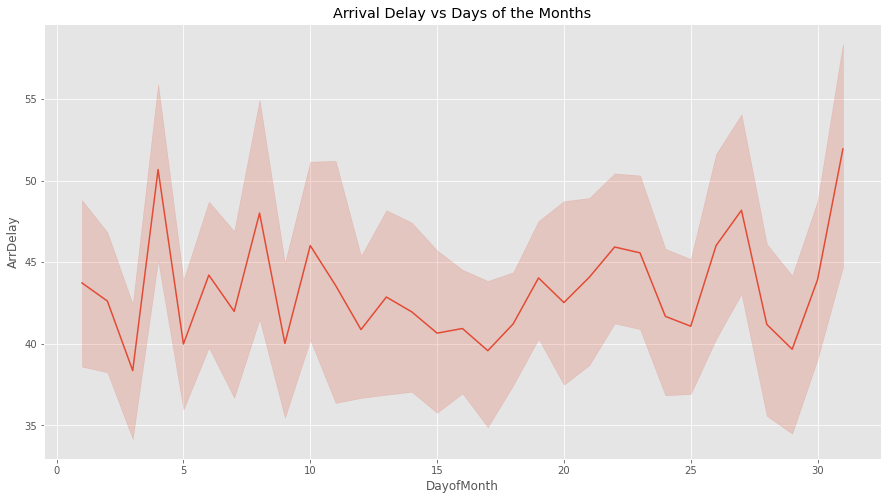

In [18]:
#Comparing Flights Delay to Months for Quicker Insight of the Delay with Days of the Month
sn.lineplot(x = "DayofMonth", y = "ArrDelay", data = df_monthgroup)
plt.title("Arrival Delay vs Days of the Months")

According to this information, flights scheduled for the end of the month are more likely than those scheduled for the middle to arrive at their destinations late.

Comparing Arrival Delay to Airport of Origin and its City:

Here, we classified arrival delays by their airports and cities of origin to determine which airports experience the most and the least arrival delays.

Text(0.5, 1.0, 'Arrival Delay vs Airport of Origin')

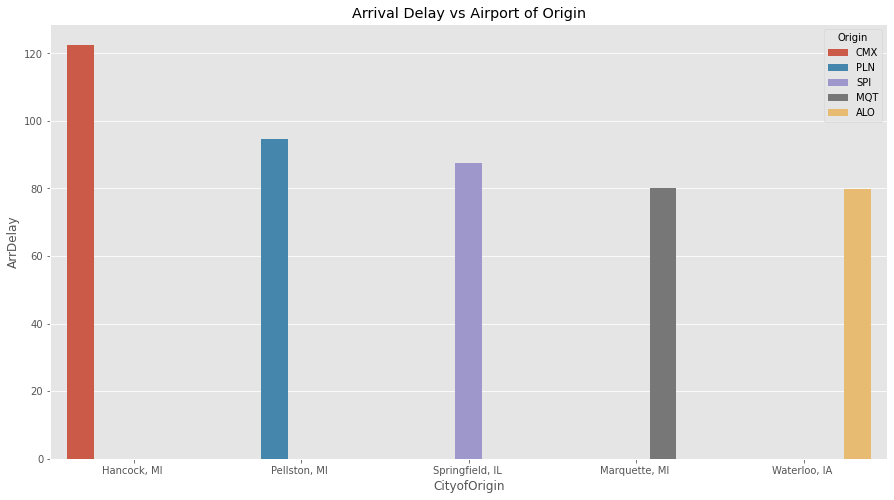

In [24]:
#Grouping by Origin
df_origin = df.groupby(["Origin", "CityofOrigin"])["ArrDelay"].mean()

#Changing the Table to Frame
df_origin = df_origin.to_frame()

#Setting Index
index = pd.Index(range(286))
df_origin = df_origin.reset_index()

#Sorting df_origin 
most_delay = df_origin.sort_values(by = "ArrDelay", ascending = False) 

#Selecting sorting the Airports Origin with Delay
sorted_origin = most_delay.sort_values(by = "ArrDelay", ascending = False)

#Selecting the top 5 Airport with most Delay
most_delay = sorted_origin[sorted_origin["ArrDelay"] > 79.6]

#Visaulizing most Delay
sn.barplot(x = "CityofOrigin", y = "ArrDelay", data = most_delay, hue = "Origin")
plt.title("Arrival Delay vs Airport of Origin")

Here, we can observe which airports experience the most arrival delays: CMX, PLN, SPI, MQT, and ALQ. Hancock, Michigan's CMX Airport has the longest average arrival delay—more than 120 minutes.

Text(0.5, 1.0, 'Arrival Delay vs Airport of Origin')

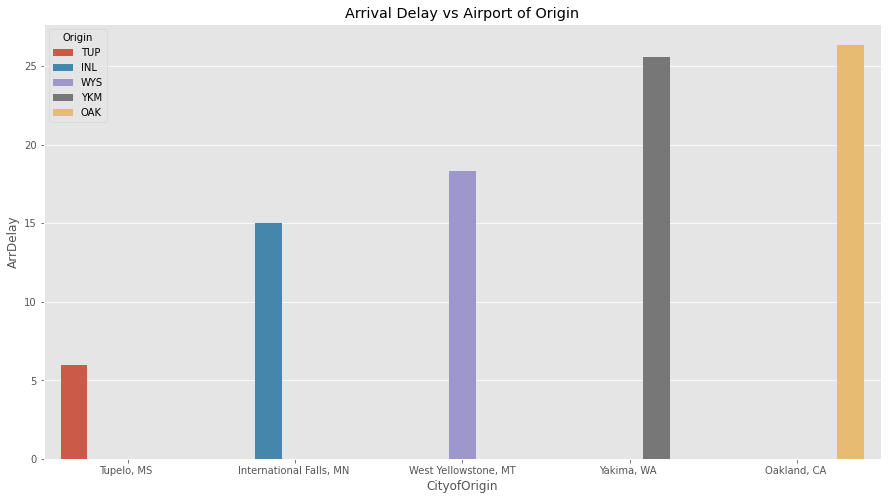

In [20]:
#Selecting the least 5 Airport with less Arrival Delay
least_delay = sorted_origin[sorted_origin["ArrDelay"] < 26.4]
least_delay = least_delay.sort_values(by = "ArrDelay", ascending = True)

#Visualizing Least Delay
sn.barplot(x = "CityofOrigin", y = "ArrDelay", data = least_delay, hue = "Origin")
plt.title("Arrival Delay vs Airport of Origin")

Here, we can observe which airports experience the least arrival delays: TUP, INL, WYS, YKM, and OAK. Tupelo, Mississippi's TUP Airport has the lowest average arrival delay less than 7 minutes.

Comparing each Trips to the Weather Delay
To see which travel was weather-delayed the most, I sorted my data by trip and its weather delay in minutes.

Text(0.5, 1.0, 'Weather Delay vs Trip')

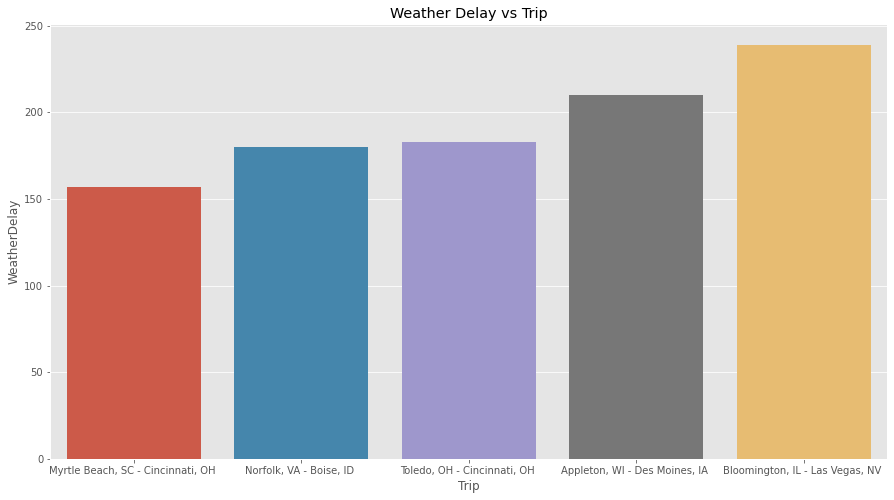

In [21]:
#Grouping by Trip
weathergroup = df.groupby("Trip")["WeatherDelay"].mean()

#Changing to frame
weathergroup = weathergroup.to_frame()

#Setting Index
index = pd.Index(range(4598))
weathergroup = weathergroup.reset_index()

#Sorting the Trip by weather delay
weathergroup = weathergroup.sort_values(by = "WeatherDelay")

#Trip with most Weather Delay
weathergroup = weathergroup[weathergroup["WeatherDelay"] > 150]

#Visualizing Trip with less weather Delay
sn.barplot(x = "Trip", y = "WeatherDelay", data = weathergroup)
plt.title("Weather Delay vs Trip")

This demonstrates that flights between Myrtle Beach, South Carolina, and Cincinnati, Ohio, experience the least amount of weather-related delays.

Diversion Rates of Each Air Carrier:

Here I grouped each Air Carrier by its diversion to see the percentage of diverted flights of each air carrier

Text(0.5, 1.0, 'Air Carrier vs Percentage of Diversion')

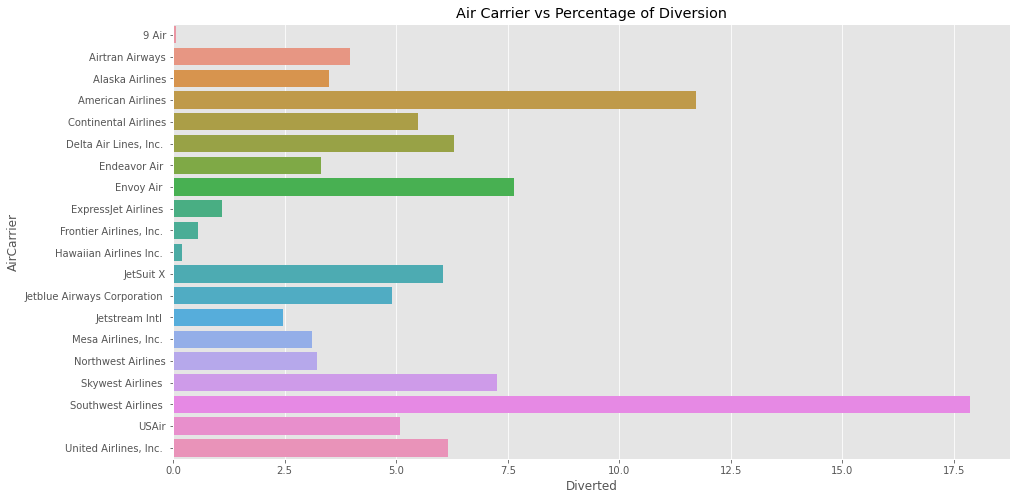

In [6]:
#Grouping by AirCarrier
diverted_AirCarrier = df.groupby("AirCarrier")["Diverted"].sum()

#Sum of Diverted Flights
diverted_sum = diverted_AirCarrier.sum()

#Percentage of Diverted AirCarrier
percent_diverted = diverted_AirCarrier / diverted_sum * 100

#Changing table to frame
percent_diverted = percent_diverted.to_frame()

#Setting index
index = pd.Index(range(14))
percent_diverted = percent_diverted.reset_index()

#Visalizing Diverted AirCarrier in percentage
sn.barplot(x = "Diverted", y = "AirCarrier", data = percent_diverted)
plt.title("Air Carrier vs Percentage of Diversion")

Here, we can see that Hawaiian Airlines Inc. has experienced the fewest flight diversions (0.19 percent), while Southwest Airlines has seen the most number of flight diversions (17.85 percent).

Comparing the Diversion to Each Airports of Origin:

Here I grouped each Airport of Origin by its diversion to see the percentage of diversion of each Airport of Origin.

Text(0.5, 1.0, '% of Diversion vs Airport of Origin')

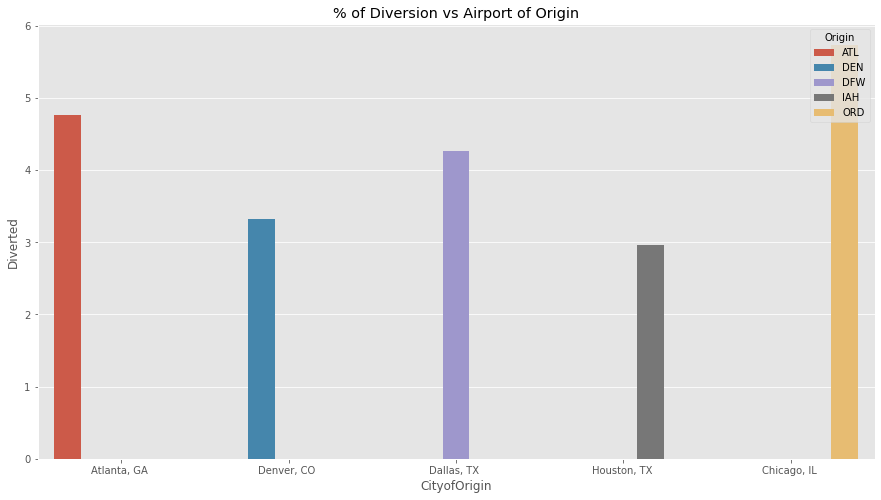

In [24]:
#Grouping by Origin
origin_diverted = df.groupby(["Origin", "CityofOrigin"])["Diverted"].sum()

#Summation of Total Diversion by Origin
origin_diverted_sum = origin_diverted.sum()

#Calculating the percentage Diverted by Airport
percentage_origin_diverted =  origin_diverted / origin_diverted_sum * 100

#Changing the table to frame
percentage_origin_diverted = percentage_origin_diverted.to_frame()

#Setting Index
index = pd.Index(range(286))
percentage_origin_diverted = percentage_origin_diverted.reset_index()

#Top 5 Airports with most Diversions
most_diverted_origin = percentage_origin_diverted[percentage_origin_diverted["Diverted"] > 2.94]

#Visualizing the Airport with Higest percentage of diversion
sn.barplot(x = "CityofOrigin", y = "Diverted", hue = "Origin", data = most_diverted_origin)
plt.title("% of Diversion vs Airport of Origin")

Here, we can see that flights from ORD, Chicago, Illinois Airport, has experienced the highest flight diversions of more than 5%

Comparing the Diversion rates with the Trips:

Here I grouped each Trip by its diversion to see the percentage of diversion of each Trip

Text(0.5, 1.0, '% of Diversion vs Trip')

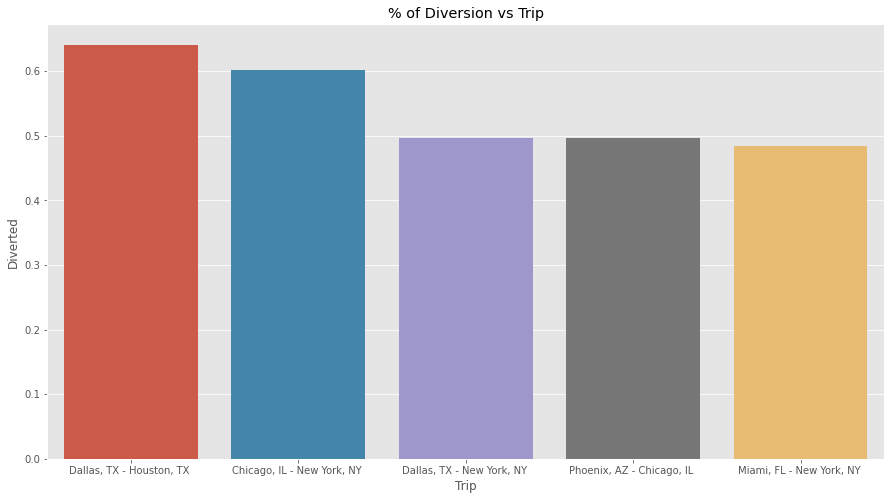

In [25]:
#Grouping by Trip
diverted_trip = df.groupby("Trip")["Diverted"].sum()

#Summation of Diverted Trip
summation = diverted_trip.sum()

#Calculating Percentage of Diverted Trip
percentage_diverted_trip = (diverted_trip / summation) * 100 

#Data to Frame
percentage_diverted_trip = percentage_diverted_trip.to_frame()

#Setting Index
index = pd.Index(range(4711))
percentage_diverted_trip = percentage_diverted_trip.reset_index()

#Sorting the Data
percentage_diverted_trip = percentage_diverted_trip.sort_values(by = "Diverted")

#Selecting trips with most Diversion
percentage_diverted_trip = percentage_diverted_trip[percentage_diverted_trip["Diverted"] > 0.48]
percentage_diverted_trip = percentage_diverted_trip.sort_values(by = "Diverted", ascending = False)

#Visaulizing the Trip with most Diversion
sn.barplot(x = "Trip", y = "Diverted", data = percentage_diverted_trip)
plt.title("% of Diversion vs Trip")

Here, we can see that flights from Dallas, Texas to Houston, Taxas experienced the most flight diversions of more than 0.6%.

# Correlation

 A statistical technique called correlation analysis would be used to determine whether or if there is a link between among the variables in the dataset and how strong that relationship could be.
I'll begin by using catcodes, to represent the values in my dataset, These codes are  array of integers which are the positions of the actual values in the categories array then by use heatmap to visuallize the graphical correlation matrix for each pair of columns in the dataframe.

In [5]:
#Introducing CatCodes to my Data Frame
numerized_df = df

for col_name in numerized_df.columns:
    if(numerized_df[col_name].dtype == 'object'):
        numerized_df[col_name] = numerized_df[col_name].astype("category")
        numerized_df[col_name] = numerized_df[col_name].cat.codes
#correlation_matrix
correlation_matrix = df.corr(method = "pearson")
correlation_matrix

Heatmap

<AxesSubplot:>

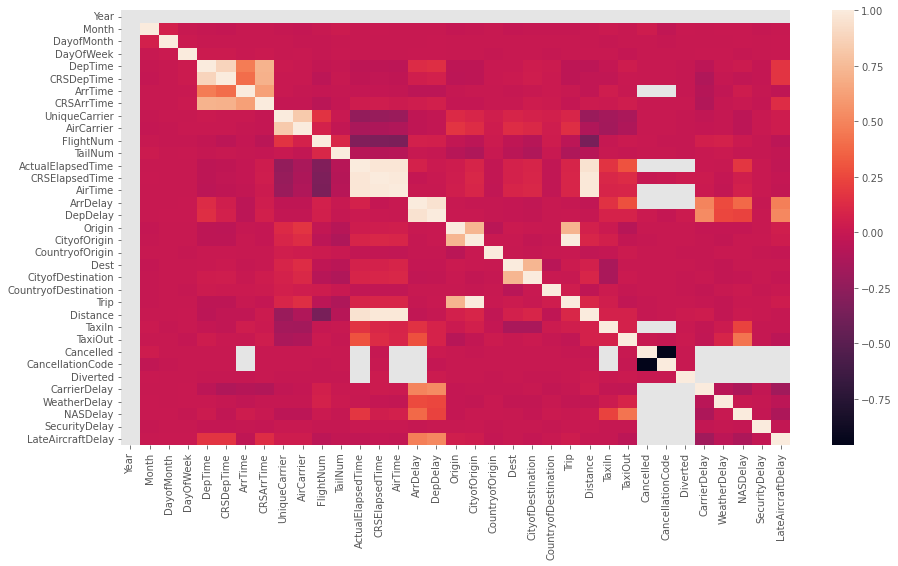

In [7]:
sn.heatmap(correlation_matrix)

In [8]:
#rearranging the correlation_matrix for easier insights
correlation_matrix = correlation_matrix.unstack()

#Changing to Data Frame
correlation_matrix = correlation_matrix.to_frame()

#Setting Index
index = pd.Index(range(1225))
correlation_matrix = correlation_matrix.reset_index()

#Renaming the Columns
correlation_matrix =  correlation_matrix.rename(columns = {"level_0": "CorrA", "level_1":"CorrB", 0:"CorrValues"})
correlation_matrix

,CorrA,CorrB,CorrValues
0,Year,Year,NaN
1,Year,Month,NaN
2,Year,DayofMonth,NaN
3,Year,DayOfWeek,NaN
4,Year,DepTime,NaN
...,...,...,...
1220,LateAircraftDelay,CarrierDelay,-0.178124
1221,LateAircraftDelay,WeatherDelay,-0.054884
1222,LateAircraftDelay,NASDelay,-0.118683
1223,LateAircraftDelay,SecurityDelay,-0.019258


Arrival Delay Correlation:

Here, I'll use the pearson approach to determine how Arrival delay and other dataset factors relate to one another.

In [29]:
#ArrDelay Correlation
ArrDelay_Corr = correlation_matrix[correlation_matrix["CorrA"] == "ArrDelay"]

#Sorrting it to see the which **** has the Heighest Relationship with Arival Delay
ArrDelay_Corr = ArrDelay_Corr.sort_values(by = "CorrValues", ascending = False)
ArrDelay_Corr

,CorrA,CorrB,CorrValues
540,ArrDelay,ArrDelay,1.000000
541,ArrDelay,DepDelay,0.953000
555,ArrDelay,CarrierDelay,0.502423
559,ArrDelay,LateAircraftDelay,0.478330
557,ArrDelay,NASDelay,0.387087
551,ArrDelay,TaxiOut,0.286188
556,ArrDelay,WeatherDelay,0.264353
550,ArrDelay,TaxiIn,0.156205
529,ArrDelay,DepTime,0.126728
537,ArrDelay,ActualElapsedTime,0.068363


Visualizing the Correlation between Arrival Delay and Departure Delay

Text(0.5, 1.0, 'Correlation Between Arrival Delay and Departure Delay')

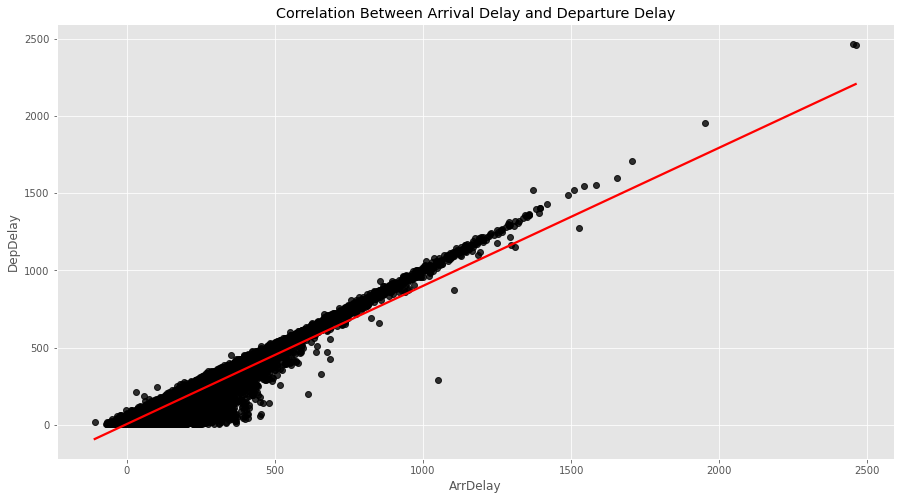

In [30]:
sn.regplot(x = "ArrDelay", y = "DepDelay", data = df, scatter_kws= {"color":"black"}, line_kws= {"color":"red"})
plt.title("Correlation Between Arrival Delay and Departure Delay")

We can see from the dataframe and graph above that the arrival delay is positively associated with the departure delay, with a correlation coefficient of magnitude of 0.95, indicating that the association between the two is quite strong.

Departure Delay Correlation:

Here, I'll use the same pearson method to determine how Departure delay and other dataset factors relate to one another.

In [27]:
#DepDelay Correlation
DepDelay_Corr = correlation_matrix[correlation_matrix["CorrA"] == "DepDelay"]

#Sorting it to see the which **** has the Heighest Relationship with Departure Delay
DepDelay_Corr = DepDelay_Corr.sort_values(by = "CorrValues", ascending = False)
DepDelay_Corr

,CorrA,CorrB,CorrValues
576,DepDelay,DepDelay,1.000000
575,DepDelay,ArrDelay,0.953000
590,DepDelay,CarrierDelay,0.528578
594,DepDelay,LateAircraftDelay,0.513191
591,DepDelay,WeatherDelay,0.244234
592,DepDelay,NASDelay,0.233640
564,DepDelay,DepTime,0.138870
586,DepDelay,TaxiOut,0.078706
585,DepDelay,TaxiIn,0.074759
565,DepDelay,CRSDepTime,0.058861


Visaulizing Departure Delay and Carrier Delay

Text(0.5, 1.0, 'Correlation Between Carrier Delay and Departure Delay')

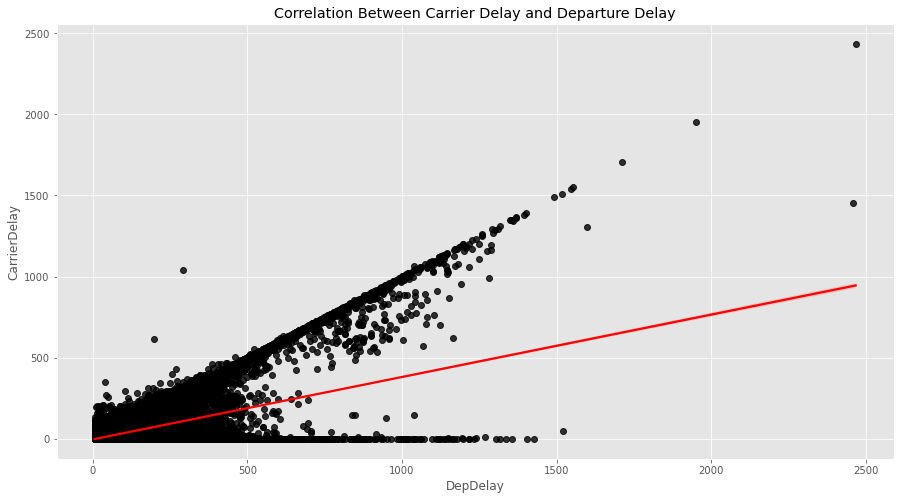

In [28]:
sn.regplot(x = "DepDelay", y = "CarrierDelay", data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between Carrier Delay and Departure Delay")

Here we can see that carrier delay is moderatelly correlated with departure delay with magnitude of 0.52

Visualizing the Correlation between Departure Delay and LateAircraftDelay

Text(0.5, 1.0, 'Correlation Between Late Aircraft Delay and Departure Delay')

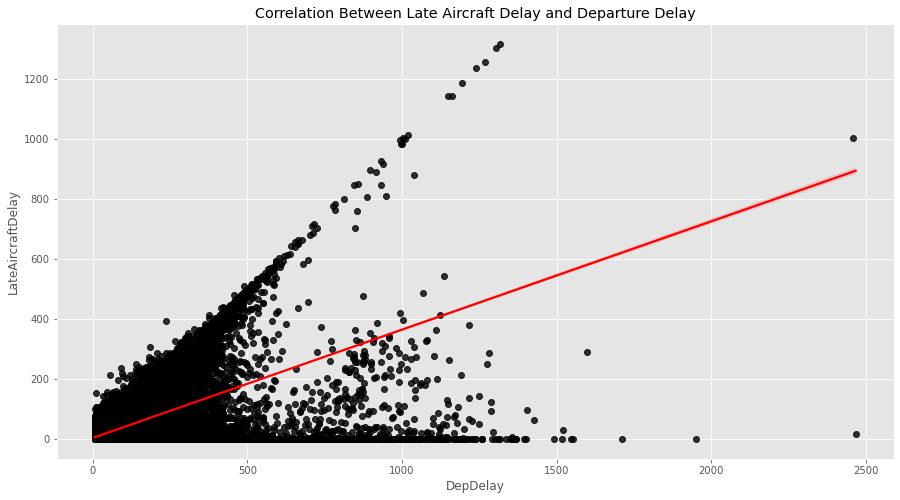

In [30]:
sn.regplot(x = "DepDelay", y = "LateAircraftDelay", data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between Late Aircraft Delay and Departure Delay")

The aforementioned graph also shown that departure delay and late aircraft delay had a somewhat positive (uphill) connection with a correlation coefficient of 0.51.

Visualizing the Correlation between Departure Delay and WeatherDelay:

<AxesSubplot:xlabel='DepDelay', ylabel='WeatherDelay'>

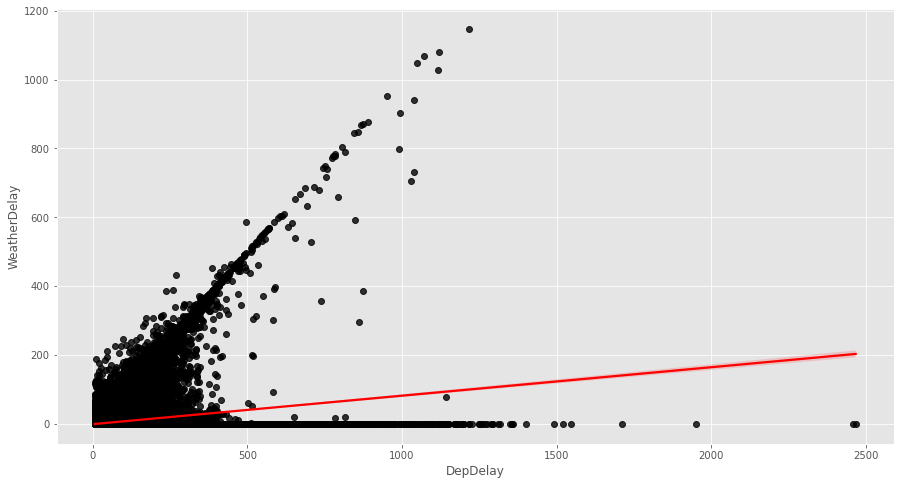

In [48]:
sn.regplot(x = "DepDelay", y = "WeatherDelay", data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between Weather Delay and Departure Delay")

The graph a  A weak uphill (positive) linear relationship between Weather Delay and Departure delay with correlation coefficient of 0.2.  As a result, there is relatively little correlation between weather and departure delay.

Visualizing the Correlation between Departure Delay and NASDelay

<AxesSubplot:xlabel='DepDelay', ylabel='NASDelay'>

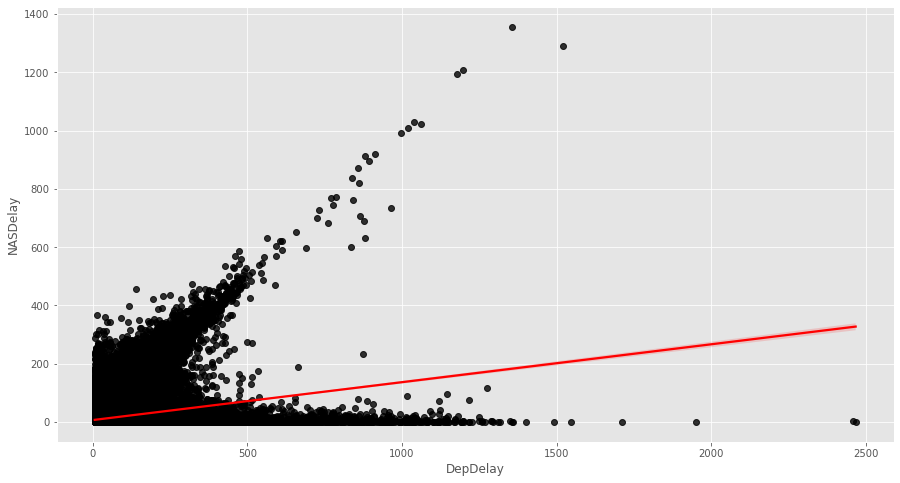

In [49]:
sn.regplot(x = "DepDelay", y = "NASDelay", data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between NAS Delay and Departure Delay")

The above graph also shown that NAS Delay delay and Departure delay had a weak positive (uphill) connection with a correlation coefficient of 0.23.

Visualizing the Correlation between Departure Delay and TaxiOut

<AxesSubplot:xlabel='DepDelay', ylabel='TaxiOut'>

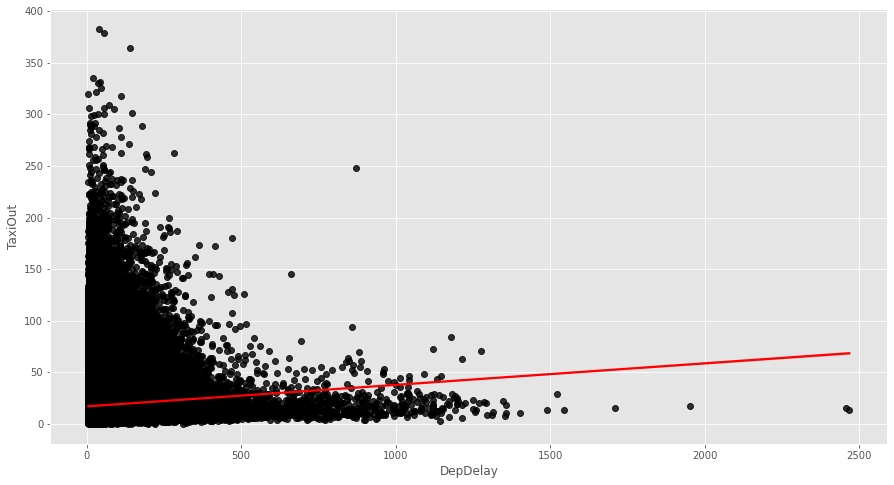

In [50]:
sn.regplot(x = "DepDelay", y = "TaxiOut", data = df, scatter_kws = {"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between TaxiOut and Departure Delay")

This demonstrates a positive correlation between the average TaxiOut and the Departure Delay. But the connection is frail.

Diverted Correlation:

This Function plots a graphical correlation matrix between the Diversion each pair of columns in the dataframe.

In [47]:
#Diverted Correlation
Diverted_Corr = correlation_matrix[correlation_matrix["CorrA"] == "Diverted"]

#Sorrting it to see the which **** has the Heighest Relationship with Arival Delay
Diverted_Corr = Diverted_Corr.sort_values(by = "CorrValues", ascending = False)
Diverted_Corr

,CorrA,CorrB,CorrValues
1044,Diverted,Diverted,1.000000
1031,Diverted,DepDelay,0.024525
1028,Diverted,CRSElapsedTime,0.017942
1039,Diverted,Distance,0.016579
1041,Diverted,TaxiOut,0.015337
1022,Diverted,CRSArrTime,0.003823
1032,Diverted,Origin,0.002706
1019,Diverted,DepTime,0.002093
1033,Diverted,CityofOrigin,0.001907
1020,Diverted,CRSDepTime,0.001574


Visualizing the Correlation between Divertion and Departure Delay

<AxesSubplot:xlabel='DepDelay', ylabel='Diverted'>

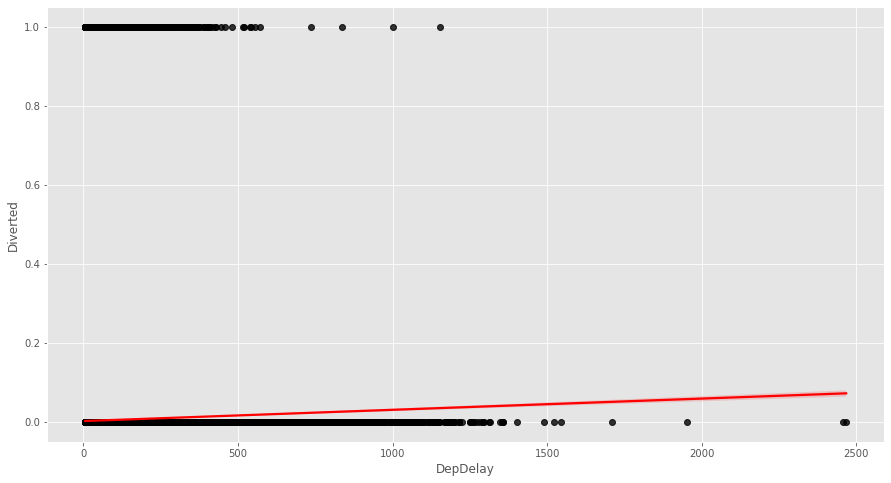

In [41]:
sn.regplot(x = "DepDelay", y = "Diverted", data = df, scatter_kws={"color":"black"}, line_kws = {"color":"red"})
plt.title("Correlation Between Diversion and Departure Delay")

This graph shows that Diverted flights have almost no relationship with Departure delay as they have a correlation coeeficient of just 0.02